In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#PROBLEM STATEMENT:
#Predict the productivity class (Low, Medium, High) of garment workers based on various features,
#including workforce details, production parameters, and historical productivity. The objective is to develop a model
#that can assist in classifying workers into different productivity levels,helping management optimize resource allocation and improve overall efficiency in garment manufacturing.



In [ ]:
import pandas as pd

# Loading the data
df = pd.read_csv("garments_worker_productivity.csv")

# Displaying the first few rows of the DataFrame
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
# printing only the column names of the dataset for easy access
print(df.columns)

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


In [ ]:
# Group by department and quarter, and calculate descriptive statistics for actual productivity
insights = df.groupby(['department', 'quarter'])['actual_productivity'].describe()
print(insights)

                     count      mean       std       min       25%       50%  \
department quarter                                                             
finishing  Quarter1   73.0  0.733197  0.186345  0.309333  0.590741  0.797500   
           Quarter2   85.0  0.758564  0.194432  0.238042  0.628333  0.800889   
           Quarter3   40.0  0.730113  0.196802  0.256500  0.624458  0.727806   
           Quarter4   51.0  0.642944  0.229350  0.271875  0.409323  0.726933   
finishing  Quarter1   76.0  0.782769  0.172271  0.280333  0.681061  0.809438   
           Quarter2   62.0  0.773406  0.171905  0.246250  0.670076  0.821354   
           Quarter3   41.0  0.741334  0.209567  0.235795  0.606913  0.793845   
           Quarter4   57.0  0.776439  0.207808  0.259375  0.649662  0.845458   
           Quarter5   21.0  0.900174  0.128094  0.492500  0.864583  0.971867   
sweing     Quarter1  211.0  0.746671  0.146593  0.260979  0.700422  0.799963   
           Quarter2  188.0  0.727200  0.

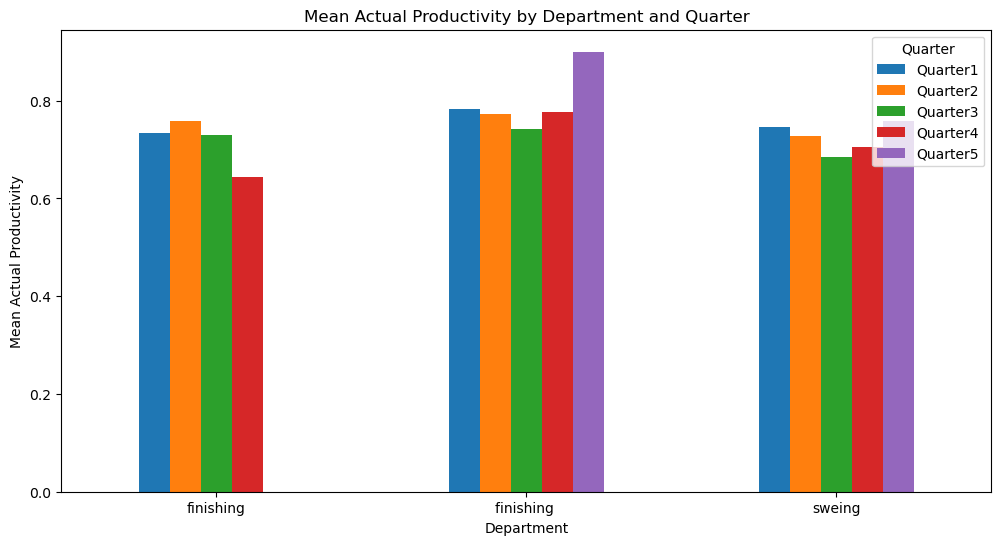

In [ ]:
import matplotlib.pyplot as plt

insights_reset = insights.reset_index()
pivot_insights = insights_reset.pivot(index='department', columns='quarter', values='mean')
# Plotting the bar graph
pivot_insights.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Mean Actual Productivity by Department and Quarter')
plt.xlabel('Department')
plt.ylabel('Mean Actual Productivity')
plt.legend(title='Quarter')
plt.show()


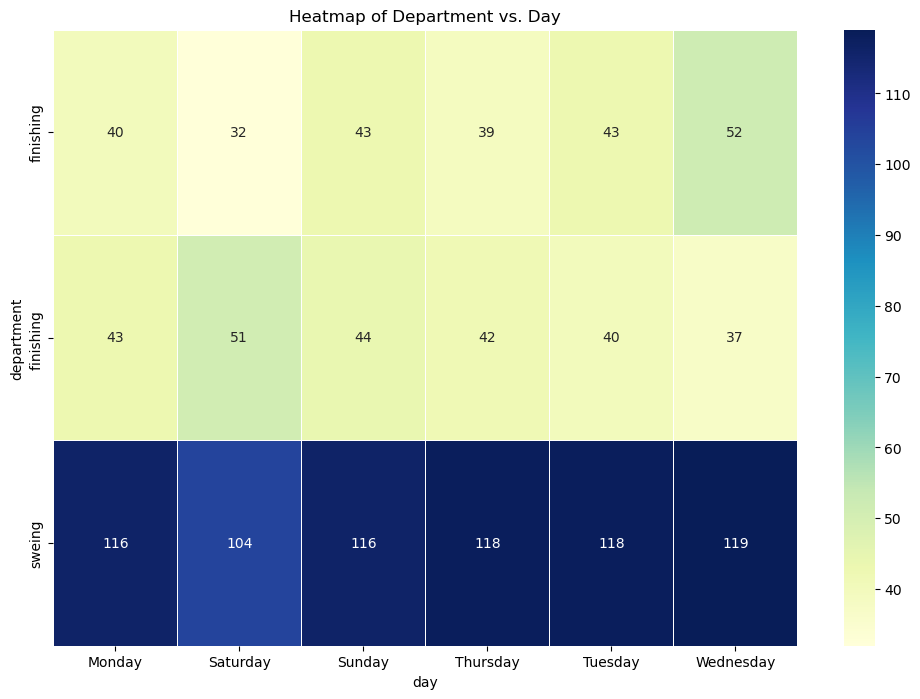

In [ ]:
#creating a heatmap, to understand different parameters: DEPARTMENT X DAYS OF WEEK
#FRIDAY IS A HOLIDAY, INSTEAD OF SUNDAY_(6 DAYS WORK)
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_data = df.groupby(['department', 'day']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap of Department vs. Day')
plt.show()

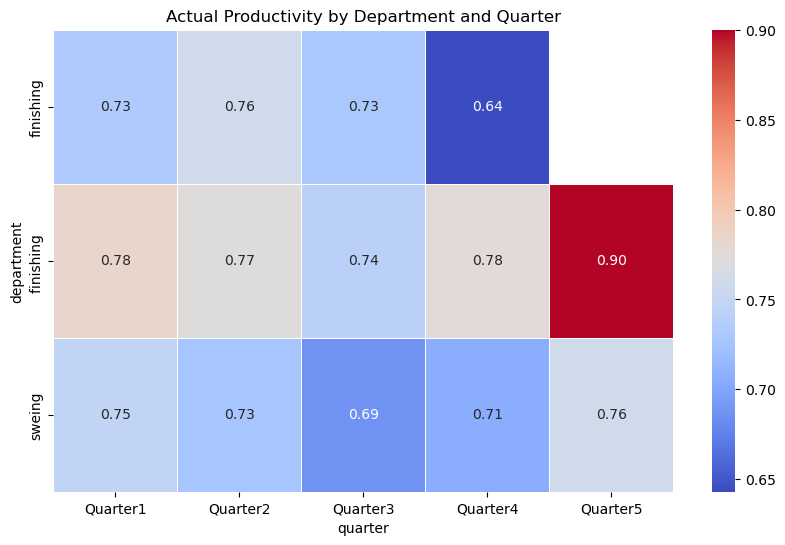

In [ ]:
#creating a heatmap, to understand different parameters: DEPARTMENT X QUARTER
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='department', columns='quarter', values='actual_productivity')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Actual Productivity by Department and Quarter')
plt.show()

In [ ]:
# Now we are going to Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
#Checking for the data types
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [ ]:
#Checking for size of the data
df.size

17955

In [ ]:
#Checking for size of the data
df.shape

(1197, 15)

In [ ]:
#Finding pearson correlation matrix
corr = df.corr(method='pearson')
corr

C:\Users\HP\AppData\Local\Temp\ipykernel_14656\3781292886.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


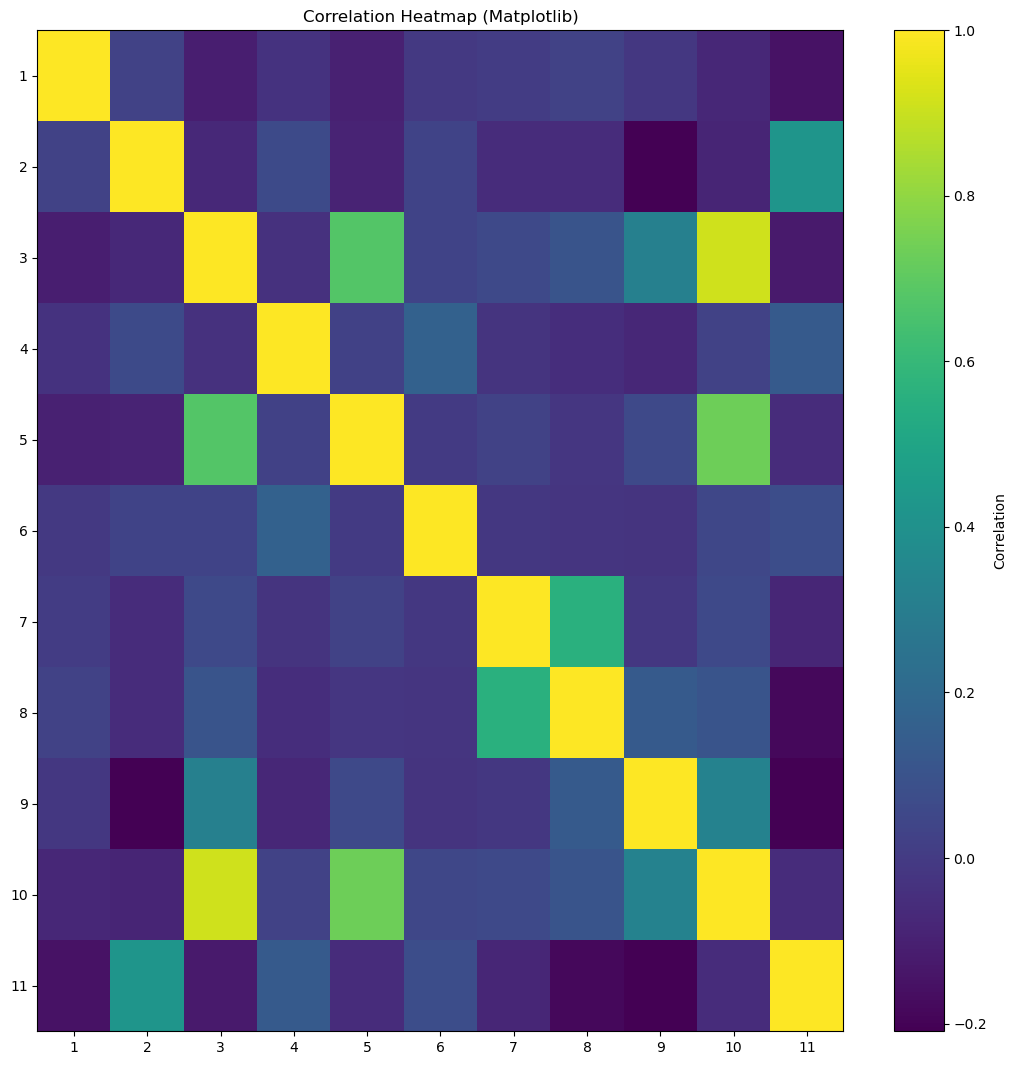

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Using matplotlib to create a heatmap of correlation
plt.figure(figsize=(13, 13))
plt.imshow(corr, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation')
plt.title('Correlation Heatmap (Matplotlib)')
plt.xticks(range(len(corr)), range(1, len(corr) + 1))
plt.yticks(range(len(corr)), range(1, len(corr) + 1))
plt.show()

In [ ]:
# Now we are Checking for missing values
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
#calculates the mean value of the 'wip' column in the DataFrame df and then rounds it to the nearest integer
int(round(df['wip'].mean(),0))

1190

In [ ]:
#replacing blank values with mean, in the column wip
df['wip'].fillna(1190,inplace=True)

In [ ]:
# Now we are again Checking for missing values
# SUCCESS: NO MISSING VALUES, we can now proceed further
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
# Now we are going to Check basic summary statistics of this data set
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.269006,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1395.647280,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1190.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1190.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
# Group by department and quarter, and calculate descriptive statistics for actual productivity
insights = df.groupby(['department', 'quarter'])['actual_productivity'].describe()
print(insights)

                     count      mean       std       min       25%       50%  \
department quarter                                                             
finishing  Quarter1   73.0  0.733197  0.186345  0.309333  0.590741  0.797500   
           Quarter2   85.0  0.758564  0.194432  0.238042  0.628333  0.800889   
           Quarter3   40.0  0.730113  0.196802  0.256500  0.624458  0.727806   
           Quarter4   51.0  0.642944  0.229350  0.271875  0.409323  0.726933   
finishing  Quarter1   76.0  0.782769  0.172271  0.280333  0.681061  0.809438   
           Quarter2   62.0  0.773406  0.171905  0.246250  0.670076  0.821354   
           Quarter3   41.0  0.741334  0.209567  0.235795  0.606913  0.793845   
           Quarter4   57.0  0.776439  0.207808  0.259375  0.649662  0.845458   
           Quarter5   21.0  0.900174  0.128094  0.492500  0.864583  0.971867   
sweing     Quarter1  211.0  0.746671  0.146593  0.260979  0.700422  0.799963   
           Quarter2  188.0  0.727200  0.

In [ ]:
#SUM OF EACH CATEGORY UNDER 'DEPARTMENT'
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [ ]:
df['department'].mode()

0    sweing
Name: department, dtype: object

In [ ]:
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
#Gives the first 5 rows of the dataset stored in'df'
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,56.0,0.800382


In [ ]:
#Gives the last 5 rows of the dataset stored in'df'
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,1190.0,960,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,1190.0,960,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,1190.0,960,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,1190.0,1800,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,1190.0,720,0,6.0,0.394722


In [ ]:
df['productivity_class'] = pd.cut(df['actual_productivity'], bins=[0, 0.33, 0.66, 1.0], labels=['0', '1', '2'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['dept_Enc']=le.fit_transform(df['department'])

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity,productivity_class,dept_Enc
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,59.0,0.940725,2,2
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,8.0,0.886500,2,1
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,30.5,0.800570,2,2
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,30.5,0.800570,2,2
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,56.0,0.800382,2,2


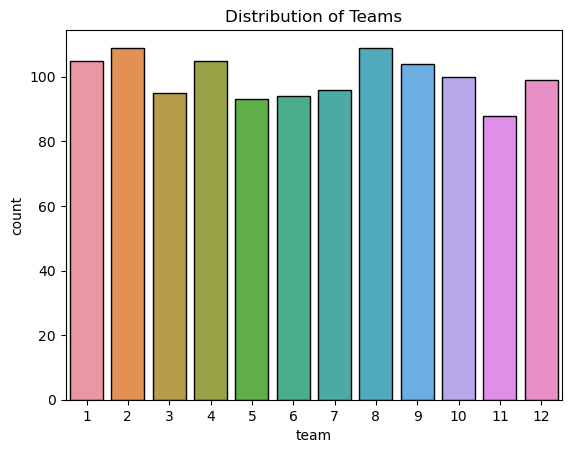

In [ ]:
# Creating Bar chart for the 'team' variable
sns.countplot(x='team', data=df, edgecolor='black')
plt.title('Distribution of Teams')
plt.show()

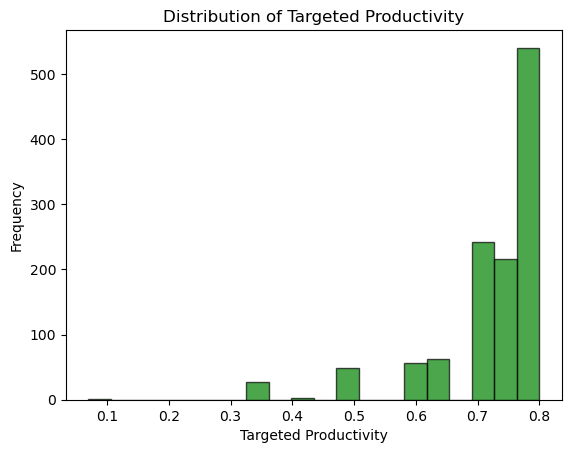

In [ ]:
# Creating an Histogram for 'targeted_productivity'
plt.hist(df['targeted_productivity'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Targeted Productivity')
plt.ylabel('Frequency')
plt.title('Distribution of Targeted Productivity')
plt.show()

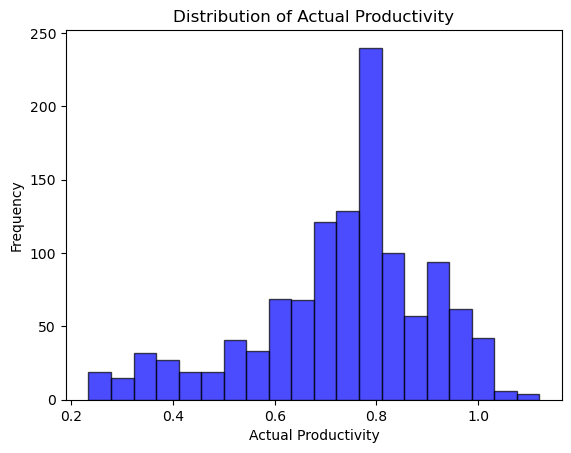

In [ ]:
# Now creating an Histogram for 'actual_productivity'
plt.hist(df['actual_productivity'], bins=20, color='blue', alpha=0.7, edgecolor='black' )
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Productivity')
plt.show()

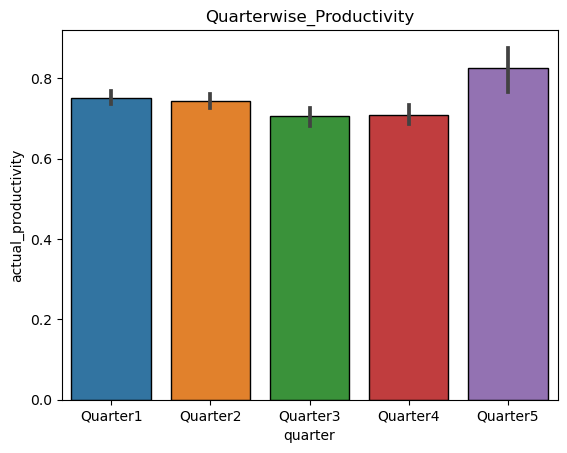

In [ ]:
#GRAPH 1: BAR GRAPH FOR'Quarterwise_Productivity'
sns.barplot(x='quarter',
           y='actual_productivity',
           data=df, edgecolor='black')
plt.title('Quarterwise_Productivity')
plt.show()

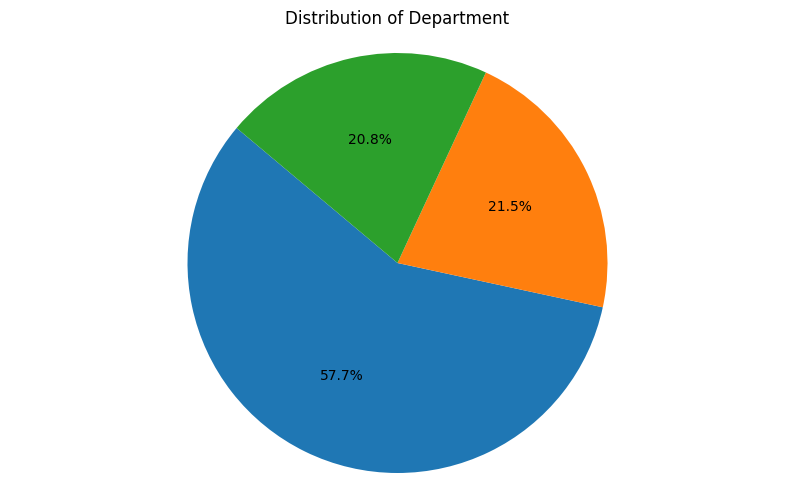

In [ ]:
#GRAPH 2:'Quarterwise_Productivity'
plt.figure(figsize=(10,6))
plt.pie(df['department'].value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Department')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_k= df[['targeted_productivity','smv','wip','incentive','no_of_workers']]
Y_k= df['team']

In [ ]:
#Dividing the Dataset into training and testing

X_train,X_test,y_train,y_test = train_test_split(X_k,Y_k,test_size=0.3,random_state=1,stratify=y) #70% training part

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Knn Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.2722222222222222

In [ ]:
print("Precision:")
precision_score(y_test, y_pred,average='micro')

Precision:


0.2722222222222222

In [ ]:
print("Recall")
recall_score(y_test, y_pred,average='micro')

Recall


0.2916666666666667

In [ ]:
print("f1 Score")
f1_score(y_test, y_pred,average='micro')

f1 Score


0.2916666666666667

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.23      0.22      0.22        32
           2       0.36      0.36      0.36        33
           3       0.23      0.29      0.25        28
           4       0.24      0.22      0.23        32
           5       0.19      0.18      0.19        28
           6       0.53      0.32      0.40        28
           7       0.10      0.10      0.10        29
           8       0.29      0.21      0.25        33
           9       0.23      0.29      0.26        31
          10       0.30      0.23      0.26        30
          11       0.18      0.31      0.23        26
          12       0.79      0.77      0.78        30

    accuracy                           0.29       360
   macro avg       0.31      0.29      0.29       360
weighted avg       0.31      0.29      0.30       360



Preliminary model score:
0.20833333333333334


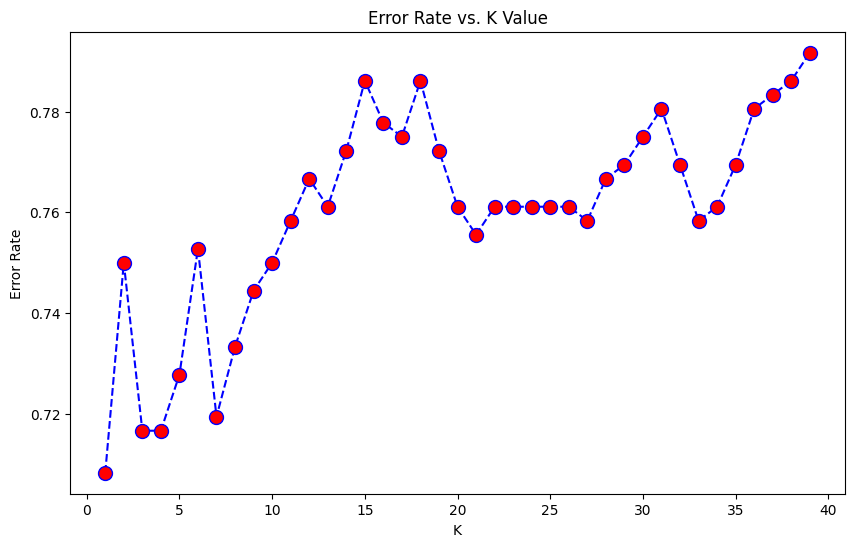

Minimum error:- 0.7083333333333333 at K = 1


In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

print("Preliminary model score:")
print(knn.score(X_test,y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [ ]:
y_pred1 = knn1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.2916666666666667

In [ ]:
!pip install xgboost

In [ ]:
print(y_train.unique())

y_train = y_train - 1
y_test = y_test - 1

import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


[ 8  4  6  9 10 12  1  5  2  7 11  3]


In [ ]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[11,  4,  1,  1,  0,  0,  2,  0, 13,  0,  0,  0],
       [ 1, 17,  3,  2,  0,  0,  1,  0,  4,  4,  1,  0],
       [ 0,  5, 13,  0,  4,  0,  0,  2,  0,  1,  2,  1],
       [ 6,  4,  1, 12,  5,  0,  2,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  2, 21,  0,  2,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  1,  2,  1,  0,  4,  0],
       [ 2,  2,  2,  1,  3,  0, 14,  5,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  1,  2, 12, 13,  1,  1,  0,  0],
       [ 5,  0,  1,  0,  1,  2,  0,  1, 20,  0,  1,  0],
       [ 1,  3,  0,  0,  0,  1,  0,  1,  4, 20,  0,  0],
       [ 0,  1,  1,  0,  3,  2,  0,  0,  0,  0, 19,  0],
       [ 1,  0,  1,  0,  0,  2,  0,  0,  0,  0,  0, 26]])

In [ ]:
accuracy_score(y_test, y_pred)

0.5722222222222222

In [ ]:
#printing precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='micro')  # Choose 'micro', 'macro', or 'weighted'
print("Precision Score:", precision)


Precision Score: 0.5722222222222222


In [ ]:
# Print the recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='micro')  # Choose 'micro', 'macro', or 'weighted'
print("Recall Score:", recall)


Recall Score: 0.5722222222222222


In [ ]:
# Print the F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='micro')  # Choose 'micro', 'macro', or 'weighted'
print("F1 Score:", f1)


F1 Score: 0.5722222222222222


In [ ]:
X_train.columns

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'no_of_workers', 'dept_Enc'],
      dtype='object')

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))



Accuracy: 0.5583333333333333


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred1)

array([[10,  5,  2,  0,  0,  0,  1,  0, 13,  0,  0,  1],
       [ 0, 19,  2,  1,  0,  0,  0,  1,  4,  5,  1,  0],
       [ 1,  3, 14,  0,  2,  0,  0,  1,  0,  1,  4,  2],
       [ 5,  4,  1, 14,  6,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  3, 23,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  1,  2,  2,  0,  3,  0],
       [ 4,  1,  0,  2,  4,  0, 12,  6,  0,  0,  0,  0],
       [ 0,  0,  2,  2,  1,  1, 12, 12,  1,  1,  1,  0],
       [ 4,  1,  0,  1,  1,  2,  1,  2, 18,  0,  1,  0],
       [ 1,  3,  0,  0,  0,  1,  0,  1,  5, 19,  0,  0],
       [ 0,  0,  2,  0,  4,  3,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1,  0,  0,  5,  0,  0,  0,  0,  0, 24]])

In [ ]:
f1_score(y_test, y_pred1, average='micro')

0.5583333333333333

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35        32
           1       0.53      0.58      0.55        33
           2       0.58      0.50      0.54        28
           3       0.61      0.44      0.51        32
           4       0.56      0.82      0.67        28
           5       0.62      0.71      0.67        28
           6       0.43      0.41      0.42        29
           7       0.44      0.36      0.40        33
           8       0.40      0.58      0.47        31
           9       0.73      0.63      0.68        30
          10       0.62      0.62      0.62        26
          11       0.89      0.80      0.84        30

    accuracy                           0.56       360
   macro avg       0.57      0.56      0.56       360
weighted avg       0.56      0.56      0.56       360



In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

smv                      0.306847
no_of_workers            0.222812
wip                      0.104263
dept_Enc                 0.099957
incentive                0.092900
targeted_productivity    0.088778
over_time                0.084442
dtype: float32

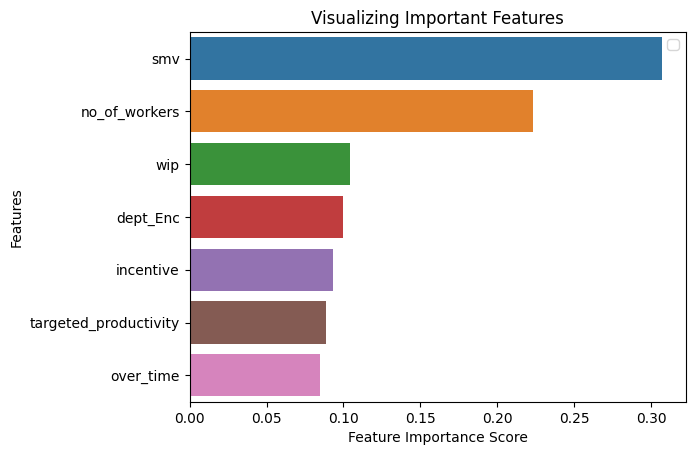

In [ ]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

In [ ]:
# Fit to training set
gbc.fit(X_train, y_train)

# Predict on test set
pred_y = gbc.predict(X_test)

# accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.56


In [ ]:
from sklearn.metrics import f1_score

# Assuming y_test and y_pred are already defined
f1 = f1_score(y_test, y_pred, average='micro')  # Choose 'micro', 'macro', or 'weighted'

# Print or use the F1 score as needed
print("F1 Score:", f1)

F1 Score: 0.5722222222222222


In [ ]:
# Defining the decision tree algorithm
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [ ]:
ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = ct.predict(X_test)

In [ ]:
#Confusion_matrix
confusion_matrix(y_test, Y_pred)

array([[10,  5,  2,  1,  0,  0,  0,  0, 13,  0,  1,  0],
       [ 0, 16,  2,  2,  0,  0,  2,  0,  5,  5,  1,  0],
       [ 1,  3, 12,  0,  3,  0,  1,  2,  0,  1,  4,  1],
       [ 4,  2,  4, 10,  2,  0,  5,  0,  1,  3,  1,  0],
       [ 0,  1,  1,  5, 17,  0,  1,  2,  0,  0,  1,  0],
       [ 3,  0,  0,  0,  2, 16,  1,  2,  1,  0,  1,  2],
       [ 2,  1,  3,  1,  3,  1, 12,  4,  0,  1,  0,  1],
       [ 0,  0,  2,  1,  3,  1, 12, 13,  1,  0,  0,  0],
       [ 4,  0,  0,  2,  1,  2,  0,  1, 20,  0,  1,  0],
       [ 1,  2,  1,  0,  0,  1,  0,  0,  7, 18,  0,  0],
       [ 0,  0,  3,  1,  3,  4,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  1,  0,  0,  2,  0,  0,  0,  0,  0, 27]])

In [ ]:
accuracy_score(y_test, Y_pred)


0.5166666666666667

In [ ]:
X_train.columns

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'no_of_workers', 'dept_Enc'],
      dtype='object')

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (100,30), dpi = 300)
tree.plot_tree(ct, max_depth = 2, rounded = True, filled = True, impurity = True,node_ids = True,
               feature_names = ['targeted_productivity', 'smv', 'over_time', 'incentive',
       'no_of_workers', 'dept_Enc']
              )

[Text(0.5, 0.875, 'node #0\ndept_Enc <= 43.5\ngini = 0.916\nsamples = 837\nvalue = [73, 76, 67, 73, 65, 66, 67, 76, 73, 70, 62, 69]'),
 Text(0.25, 0.625, 'node #1\ndept_Enc <= 30.0\ngini = 0.904\nsamples = 432\nvalue = [38, 31, 21, 35, 27, 63, 28, 35, 32, 33, 21, 68]'),
 Text(0.125, 0.375, 'node #2\nsmv <= 4.01\ngini = 0.913\nsamples = 346\nvalue = [37, 31, 21, 35, 25, 22, 28, 35, 32, 33, 20, 27]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #265\ndept_Enc <= 33.75\ngini = 0.545\nsamples = 86\nvalue = [1, 0, 0, 0, 2, 41, 0, 0, 0, 0, 1, 41]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #290\nsmv <= 14.99\ngini = 0.901\nsamples = 405\nvalue = [35, 45, 46, 38, 38, 3, 39, 41, 41, 37, 41, 1]'),
 Text(0.625, 0.375, 'node #291\nno_of_workers <= 67.5\ngini = 0.069\nsamples = 28\nvalue = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 27, 0]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6

In [ ]:
from sklearn.metrics import f1_score
# Assuming y_test and y_pred are already defined
f1 = f1_score(y_test, Y_pred,average='micro')  # Choose 'micro', 'macro', or 'weighted'
# Print or use the F1 score as needed
print("F1 Score:", f1)

F1 Score: 0.041666666666666664


In [ ]:
#The best model will be selected on the basis of 'F1 SCORE'.
#F1 SCORE FOR DECISION TREE MODEL: 0.5166666666666667
#F1 SCORE FOR RANDOM FOREST MODEL: 0.5583333333333333
#F1 SCORE FOR XGBOOST MODEL: 0.5722222222222222
#F1 SCORE FOR KNN CLASSIFIER MODEL: 0.2722222222222222
#Since the F1 Score is highest for XGBoost Model it is the best based on our dataset.

In [ ]:
print("""
HERE ARE SOME INSIGHTS AND POTENTIAL AREAS FOR IMPROVEMENT BASED ON THE METRICS:

Precision, Recall, and F1-Score
Precision: This metric indicates the accuracy of the positive predictions. For most classes, precision is moderate to good, ranging from 0.40 to 0.89.
Recall: This metric represents the ability of the classifier to capture all the positive instances. The recall values vary across classes, with some classes having higher recall than others.
F1-Score: The F1-score is the harmonic mean of precision and recall. It gives a balanced measure between precision and recall. Overall, the F1-scores are moderate, with some classes having higher values than others.

Support:
Support refers to the number of actual occurrences of the class in the specified dataset. It is relatively balanced across classes.

Accuracy:
The overall accuracy is 56%, which is the proportion of correctly predicted instances out of the total instances.

Macro and Weighted Averages:
Macro Average: This is the average of the metrics (precision, recall, F1-score) calculated independently for each class. It treats all classes equally. The macro average F1-score is 0.56.
Weighted Average: This is the weighted average of the metrics, where each class's contribution is weighted by its support. The weighted average F1-score is 0.56.

Class-Specific Insights:
Some classes (e.g., class 11) show high precision, recall, and F1-score, indicating good performance.
Other classes (e.g., class 0, class 8) may benefit from improvements, especially in precision and recall.
""")



HERE ARE SOME INSIGHTS AND POTENTIAL AREAS FOR IMPROVEMENT BASED ON THE METRICS:

Precision, Recall, and F1-Score
Precision: This metric indicates the accuracy of the positive predictions. For most classes, precision is moderate to good, ranging from 0.40 to 0.89.
Recall: This metric represents the ability of the classifier to capture all the positive instances. The recall values vary across classes, with some classes having higher recall than others.
F1-Score: The F1-score is the harmonic mean of precision and recall. It gives a balanced measure between precision and recall. Overall, the F1-scores are moderate, with some classes having higher values than others.

Support:
Support refers to the number of actual occurrences of the class in the specified dataset. It is relatively balanced across classes.

Accuracy:
The overall accuracy is 56%, which is the proportion of correctly predicted instances out of the total instances.

Macro and Weighted Averages:
Macro Average: This is the ave

In [ ]:
print("""
AFTER INTENSIVE STUDY OF THE DATASET, WE HAVE FOUND OUT VARIOUS PARAMETERS FOR IMPROVEMENT.
THE SOLUTIONS IN SEQUENCE TO THE PROBLEMS IDENTIFIED AT THE BEGINNING OF THE ANALYSIS:

Operational Efficiency:
Solution: Implement real-time monitoring systems to track machine performance, identify operational bottlenecks, and optimize processes. Utilize machine learning algorithms to analyze historical data for insights into efficiency variations across machines and operations. (USING THE PRESENT DATA AS REFERENCE FOR DATA COLLECTED IN THE FUTURE, COMPARING DIFFERENT MATRICES TO CHECK FOR IMPROVEMENTS)

Resource Utilization:
Solution: Conduct a comprehensive resource audit to identify underutilized machines or manpower. Implement scheduling optimization to ensure optimal resource allocation. Utilize data analytics to identify and address bottlenecks in the production process.

Predictive Maintenance:
Solution: Implement predictive maintenance algorithms based on machine performance data. Use sensors and IoT devices to monitor equipment health, detect anomalies, and predict maintenance requirements. This minimizes downtime and ensures consistent production.

Quality Control:
Solution: Employ machine learning models to correlate manufacturing parameters with the quality of the final products. Implement automated quality control processes using computer vision to identify defects or inconsistencies in real-time.

Scheduling Optimization:
Solution: Develop an intelligent scheduling system that optimizes manufacturing operations based on factors like machine efficiency, day of the week, quarter, and historical performance data. This ensures better resource allocation and overall efficiency.

Supply Chain Management:
Solution: Integrate production data with supply chain management systems to optimize inventory levels, reduce lead times, and ensure timely delivery of finished products.
""")



AFTER INTENSIVE STUDY OF THE DATASET, WE HAVE FOUND OUT VARIOUS PARAMETERS FOR IMPROVEMENT.
THE SOLUTIONS IN SEQUENCE TO THE PROBLEMS IDENTIFIED AT THE BEGINNING OF THE ANALYSIS:

Operational Efficiency:
Solution: Implement real-time monitoring systems to track machine performance, identify operational bottlenecks, and optimize processes. Utilize machine learning algorithms to analyze historical data for insights into efficiency variations across machines and operations. (USING THE PRESENT DATA AS REFERENCE FOR DATA COLLECTED IN THE FUTURE, COMPARING DIFFERENT MATRICES TO CHECK FOR IMPROVEMENTS)

Resource Utilization:
Solution: Conduct a comprehensive resource audit to identify underutilized machines or manpower. Implement scheduling optimization to ensure optimal resource allocation. Utilize data analytics to identify and address bottlenecks in the production process.

Predictive Maintenance:
Solution: Implement predictive maintenance algorithms based on machine performance data. Use